In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# add the path to my packages to system paths so they can be imported
import sys
sys.path.append('/home/yasamanparhizkar/Documents/yorku/01_thesis/code/my_packages')
# sys.path.append('F:\MAScThesis\code\my_packages')
# sys.path.append('/home/yasamanparhizkar/Documents/thesis/code/my_packages')

import my_first_feature_extractor as fe
import compare_with_benchmark as bn
import my_similarity_graph_eff_test as sg

/home/yasamanparhizkar/Documents/yorku/01_thesis/pyenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Test loss function (GLR)

## Explanation of the setup
Two nodes with different labels $\implies$ There is one edge connecting them.

Each node having a feature vector of size 3 $\implies \pmb{M} \in \mathcal{R}^3$ 

In [2]:
f1 = np.array([[1, 5, 3]]).T
f2 = np.array([[4, 2, 7]]).T
F = np.append(f1, f2, axis=1)
print('F - CxN matrix of feature vectors for all training images:\n', F)

F - CxN matrix of feature vectors for all training images:
 [[1 4]
 [5 2]
 [3 7]]


In [3]:
# First B/M
B1 = 0.1*np.ones((3,3))
M1 = B1.T @ B1
print('Initial value of M:\n', M1)

# Second B/M where one diagonal element is decreased
M2 = M1.copy()
M2[1,1] -= 0.01
print('Second value of M (where only one diagonal element is decreased):\n', M2)

Initial value of M:
 [[0.03 0.03 0.03]
 [0.03 0.03 0.03]
 [0.03 0.03 0.03]]
Second value of M (where only one diagonal element is decreased):
 [[0.03 0.03 0.03]
 [0.03 0.02 0.03]
 [0.03 0.03 0.03]]


In [4]:
# define other necessary parameters
mu = 0.001
x = np.array([-1, 1])
edges = [(0,1)]

In [5]:
sg.cnstr_glr(B1, True, mu, x, F, edges)

* function sg.cnstr_glr is called. Here are the inputs:
* B = 
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
* deriv =  True
* mu =  0.001
* x =  [-1  1]
* F =  [[1 4]
 [5 2]
 [3 7]]
* edges =  [(0, 1)]
* M is calculated:
 [[0.03 0.03 0.03]
 [0.03 0.03 0.03]
 [0.03 0.03 0.03]]
* for edge  (0, 1)
* fi - fj = 
 [-3  3 -4]
* wij =  0.6187833918061408
* drdM = 
 [[-22.27620211  22.27620211 -29.70160281]
 [ 22.27620211 -22.27620211  29.70160281]
 [-29.70160281  29.70160281 -39.60213708]]
* glr =  2.4751335672245633
* mu tr(M) =  9.000000000000003e-05
* exit sg.cnstr_glr


(2.4752235672245635,
 array([[-5.94012056,  5.94052056, -7.92022742],
        [-5.94012056,  5.94052056, -7.92022742],
        [-5.94012056,  5.94052056, -7.92022742]]))

In [6]:
sg.cnstr_glr_dummy(B1, True, mu, x, F, edges)

* function sg.cnstr_glr_dummy is called. Here are the inputs:
* B = 
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
* deriv =  True
* mu =  0.001
* x =  [-1  1]
* F =  [[1 4]
 [5 2]
 [3 7]]
* edges =  [(0, 1)]
* M is calculated:
 [[0.03 0.03 0.03]
 [0.03 0.02 0.03]
 [0.03 0.03 0.03]]
* for edge  (0, 1)
* fi - fj = 
 [-3  3 -4]
* wij =  0.6770568744981647
* drdM = 
 [[-24.37404748  24.37404748 -32.49872998]
 [ 24.37404748 -24.37404748  32.49872998]
 [-32.49872998  32.49872998 -43.33163997]]
* glr =  2.7082274979926586
* mu tr(M) =  8.000000000000002e-05
* exit sg.cnstr_glr_dummy


(2.7083074979926587,
 array([[-6.499546  ,  6.499946  , -8.66612799],
        [-6.499546  ,  6.499946  , -8.66612799],
        [-6.499546  ,  6.499946  , -8.66612799]]))

## Test coordination with gradient descent

In [7]:
# define a neat loss function to use in gradient descent
dess = F.copy()

def cnstr_glr_wrap(B, deriv=False):
        return sg.cnstr_glr(B, deriv, mu=mu, x=x, F=F, edges=edges)

# test above function
cnstr_glr_wrap(B1, False)

* function sg.cnstr_glr is called. Here are the inputs:
* B = 
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
* deriv =  False
* mu =  0.001
* x =  [-1  1]
* F =  [[1 4]
 [5 2]
 [3 7]]
* edges =  [(0, 1)]
* M is calculated:
 [[0.03 0.03 0.03]
 [0.03 0.03 0.03]
 [0.03 0.03 0.03]]
* for edge  (0, 1)
* fi - fj = 
 [-3  3 -4]
* wij =  0.6187833918061408
* glr =  2.4751335672245633
* mu tr(M) =  9.000000000000003e-05
* exit sg.cnstr_glr


2.4752235672245635

In [8]:
opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 2, \
              'num_its':10, 'check_freq':1, 'print_checks':True, 'Theta0':B1, \
              'force_all_its': True, 'threshold': 0.01}

B, stats = sg.gradient_descent(cnstr_glr_wrap, opt_params)

* function sg.cnstr_glr is called. Here are the inputs:
* B = 
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
* deriv =  True
* mu =  0.001
* x =  [-1  1]
* F =  [[1 4]
 [5 2]
 [3 7]]
* edges =  [(0, 1)]
* M is calculated:
 [[0.03 0.03 0.03]
 [0.03 0.03 0.03]
 [0.03 0.03 0.03]]
* for edge  (0, 1)
* fi - fj = 
 [-3  3 -4]
* wij =  0.6187833918061408
* drdM = 
 [[-22.27620211  22.27620211 -29.70160281]
 [ 22.27620211 -22.27620211  29.70160281]
 [-29.70160281  29.70160281 -39.60213708]]
* glr =  2.4751335672245633
* mu tr(M) =  9.000000000000003e-05
* exit sg.cnstr_glr
* function sg.cnstr_glr is called. Here are the inputs:
* B = 
 [[ 11.98024112 -11.78104112  15.94045483]
 [ 11.98024112 -11.78104112  15.94045483]
 [ 11.98024112 -11.78104112  15.94045483]]
* deriv =  False
* mu =  0.001
* x =  [-1  1]
* F =  [[1 4]
 [5 2]
 [3 7]]
* edges =  [(0, 1)]
* M is calculated:
 [[ 430.57853207 -423.41913998  572.91147741]
 [-423.41913998  416.3787898  -563.38546161]
 [ 572.91147741 -563.38546161  

# Load spike data

In [9]:
# load all spike data from file
data_path = '../../../data/original_files/'
binned_data = np.loadtxt(data_path + 'spikes.csv', delimiter=',')
binned_data = binned_data.reshape(binned_data.shape[0], 1141, 113)

I_order_10 = [54, 35, 10, 60, 74, 9, 61, 56, 91, 104]

In [10]:
# print some statistics
print('binned_data.shape = ', binned_data.shape)

avg_spike_perc = 0
print('neuron #    | percentage belonging to class 1')
print('---------------------------------------------')
for neu_i in I_order_10:
    pers = fe.class_percentages(binned_data[0,:,neu_i], [0, 1])
    avg_spike_perc += pers[1]
    print('neuron #{:3} | {:.2f}%'.format(neu_i, pers[1]))

avg_spike_perc /= 10
print('---------------------------------------------')
print('AVERAGE     | {:.2f}% of data belongs to class 1'.format(avg_spike_perc))

binned_data.shape =  (297, 1141, 113)
neuron #    | percentage belonging to class 1
---------------------------------------------
neuron # 54 | 1.84%
neuron # 35 | 2.63%
neuron # 10 | 2.28%
neuron # 60 | 1.58%
neuron # 74 | 1.93%
neuron #  9 | 0.44%
neuron # 61 | 3.24%
neuron # 56 | 1.14%
neuron # 91 | 5.78%
neuron #104 | 2.10%
---------------------------------------------
AVERAGE     | 2.30% of data belongs to class 1


# Load feature vectors

## Create a small graph

Two data points, each with a 3-dim feature vector.

In [11]:
labels = binned_data[0,:,I_order_10[0]]
max_sz = 1141 - 32 + 1
train_num = 3
val_num = 3
dim = 3

## Training set

In [12]:
# choose data points
train_ind_1 = np.arange(1141)[labels == 0][33]
train_ind_2 = np.arange(1141)[labels == 0][38]
train_ind_3 = np.arange(1141)[labels == 1][1]
print('For training:\nind_1 = ', train_ind_1, ', ind_2 = ', train_ind_2, ', ind_3 = ', train_ind_3)

For training:
ind_1 =  33 , ind_2 =  38 , ind_3 =  255


In [13]:
# get corresponding feature vectors and truncate them
datapath = '../../../data/slowfast_4608/'
fv1 = torch.load(datapath+'fv_'+str(train_ind_1-31)+'.pt')[:,:dim]
fv2 = torch.load(datapath+'fv_'+str(train_ind_2-31)+'.pt')[:,:dim]
fv3 = torch.load(datapath+'fv_'+str(train_ind_3-31)+'.pt')[:,:dim]
train_dess = torch.cat((fv1, fv2, fv3), dim=0)
train_dess = train_dess.detach().numpy()

print('For training:\nfv1 = ', train_dess[0], ', fv2 = ', train_dess[1], ', fv3 = ', train_dess[2])

For training:
fv1 =  [0.09669251 0.15152098 0.09669251] , fv2 =  [0.09732176 0.15080526 0.09855133] , fv3 =  [0.07664519 0.08496031 0.08190619]


In [14]:
# crate the label list
train_lbls = np.array([0, 0, 1])
print('For training:\nlbls = ', train_lbls)

For training:
lbls =  [0 0 1]


## Validation set

In [15]:
# choose data points
val_ind_1 = np.arange(1141)[labels == 0][40]
val_ind_2 = np.arange(1141)[labels == 0][45]
val_ind_3 = np.arange(1141)[labels == 1][3]
print('For validation:\nind_1 = ', val_ind_1, ', ind_2 = ', val_ind_2, ', ind_3 = ', val_ind_3)

For validation:
ind_1 =  40 , ind_2 =  45 , ind_3 =  321


In [16]:
# get corresponding feature vectors and truncate them
datapath = '../../../data/slowfast_4608/'
fv1 = torch.load(datapath+'fv_'+str(val_ind_1-31)+'.pt')[:,:dim]
fv2 = torch.load(datapath+'fv_'+str(val_ind_2-31)+'.pt')[:,:dim]
fv3 = torch.load(datapath+'fv_'+str(val_ind_3-31)+'.pt')[:,:dim]
val_dess = torch.cat((fv1, fv2, fv3), dim=0)
val_dess = val_dess.detach().numpy()

print('For validation:\nfv1 = ', val_dess[0], ', fv2 = ', val_dess[1], ', fv3 = ', val_dess[2])

For validation:
fv1 =  [0.09665465 0.1557547  0.09654949] , fv2 =  [0.09627504 0.15552911 0.09556399] , fv3 =  [0.01311007 0.02681325 0.01311007]


In [17]:
# crate the label list
val_lbls = np.array([0, 0, 1])
print('For validation:\nlbls = ', val_lbls)

For validation:
lbls =  [0 0 1]


# Use the similiarity graph model on the data

In [45]:
# reload sg after change
# import importlib
# importlib.reload(sg)

<module 'my_similarity_graph_eff_test' from '/home/yasamanparhizkar/Documents/yorku/01_thesis/code/my_packages/my_similarity_graph_eff_test.py'>

In [46]:
# learning phase
sg_opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 2, \
              'num_its':10, 'check_freq':1, 'print_checks':True, 'Theta0':None, \
              'force_all_its': True, 'threshold': 0.01}

B, sg_stats = sg.fit_graph(60*train_dess, train_lbls, sg_opt_params, mux=0.01, D=2, seed=0)

entered sg.fit_graph. Here are the inputs:
dess
 [[5.8015504 9.091259  5.8015504]
 [5.8393054 9.048316  5.9130797]
 [4.5987115 5.0976186 4.9143715]]
lbls
 [0 0 1]
opt_params
 {'epsilon0': 1, 'epsilon_decay': 0.5, 'epsilon_jump': 2, 'num_its': 10, 'check_freq': 1, 'print_checks': True, 'Theta0': None, 'force_all_its': True, 'threshold': 0.01}
D
 2
seed
 0
Theta0 was changed to:
 [[0.07761321 0.10114208 0.0852428 ]
 [0.07705738 0.05991326 0.09134235]
 [0.06188358 0.12611454 0.13628119]]
Number of training datapoints: 3
Number of features for each point: 3
mu = 0.01
SG edges are: [(0, 2), (1, 2)]
labels are 
 [-1 -1  1]
-----------------------------------------------
* function sg.cnstr_glr is called. Here are the inputs:
* M is calculated:
 [[0.01579123 0.02027114 0.02208814]
 [0.02027114 0.0297242  0.03128129]
 [0.02208814 0.03128129 0.03418232]]
* for edge  (0, 2)
* wij =  0.3725490456688994
* for edge  (1, 2)
* wij =  0.359651303501818
* drdM = 
 [[ -43.7016655  -142.09372343  -33.726

In [47]:
B

array([[-0.2570851 , -0.82863947, -0.19957333],
       [-0.1873879 , -0.59998305, -0.14615879],
       [-0.31255187, -1.01271304, -0.2454737 ]])

In [49]:
# estimation phase
acc, y_est, t = sg.get_acc(B, 60*train_dess, train_lbls, 60*val_dess, val_lbls)

print('val acc = ', acc)
print('estimated val labels = ', (y_est>0).astype(np.int32))

# save results
# np.savetxt('results/sg_val_acc.txt', np.array([acc]))
# np.savetxt('results/sg_y_est.csv', y_est, delimiter=',')

sg.get_acc is called. Here are the inputs:
B = 
 [[-0.2570851  -0.82863947 -0.19957333]
 [-0.1873879  -0.59998305 -0.14615879]
 [-0.31255187 -1.01271304 -0.2454737 ]]
train_des =
 [[5.8015504 9.091259  5.8015504]
 [5.8393054 9.048316  5.9130797]
 [4.5987115 5.0976186 4.9143715]]
train_y = 
 [0 0 1]
val_des = 
 [[5.7992787 9.345282  5.792969 ]
 [5.776502  9.331747  5.7338395]
 [0.7866044 1.6087948 0.7866044]]
val_y = 
 [0 0 1]
train_gt is computed:  [-1 -1  1]
function sg.extrapolate is called. Here are the inputs:
B = 
 [[-0.2570851  -0.82863947 -0.19957333]
 [-0.1873879  -0.59998305 -0.14615879]
 [-0.31255187 -1.01271304 -0.2454737 ]]
train_des =
 [[5.8015504 9.091259  5.8015504]
 [5.8393054 9.048316  5.9130797]
 [4.5987115 5.0976186 4.9143715]]
val_des = 
 [[5.7992787 9.345282  5.792969 ]
 [5.776502  9.331747  5.7338395]
 [0.7866044 1.6087948 0.7866044]]
train_gt = 
 [-1 -1  1]
# of train points:  3
# of val points:  3
# of features for each point:  3
exit sg.extrapolate
y_th =  [0 0

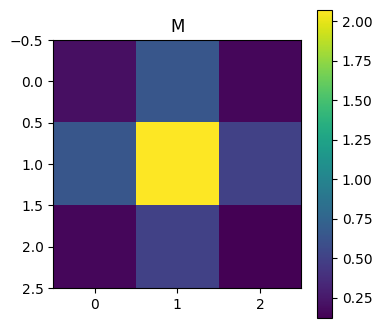

In [50]:
# display learned M
M = B.T @ B
# to preserve memory, uncomment below line
# del B

sg.display_matrix(M, 'M')

# save results
# plt.savefig('results/sg_finalM.png')
# np.savetxt('results/sg_finalB.csv', B, delimiter=',')

Text(0.5, 1.0, 'Time spent to find a valid stepsize in each iteration')

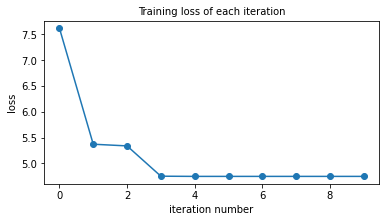

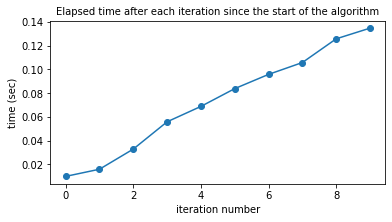

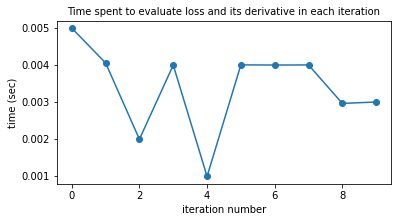

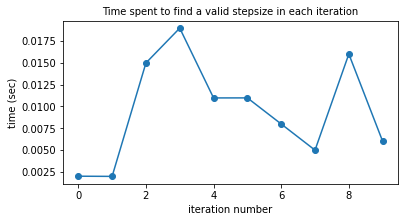

In [29]:
# Some informative figures to compare forced and flexible time complexity
plt.figure(figsize=(6,3))
plt.plot(sg_stats['train_losss'], marker='o')
# plt.legend(['sg', 'nn'])
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.title('Training loss of each iteration', fontsize=10)
# plt.savefig('results/sg_trainlosss.png')

plt.figure(figsize=(6,3))
plt.plot(sg_stats['it_times'], marker='o')
# plt.legend(['sg', 'nn'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Elapsed time after each iteration since the start of the algorithm', fontsize=10)
# plt.savefig('results/sg_runtime.png')

plt.figure(figsize=(6,3))
plt.plot(sg_stats['eval_times'], marker='o')
# plt.legend(['sg', 'nn'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Time spent to evaluate loss and its derivative in each iteration', fontsize=10)
# plt.savefig('results/sg_evallosstime.png')

plt.figure(figsize=(6,3))
plt.plot(sg_stats['stepsizeloop_times'], marker='o')
# plt.legend(['sg', 'nn'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Time spent to find a valid stepsize in each iteration', fontsize=10)
# plt.savefig('results/sg_epsilontime.png')

Text(0.5, 1.0, 'Histogram of M entries')

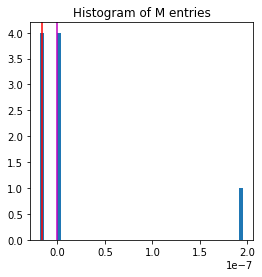

In [65]:
sg.hist_of_entries(M, 50, zeroline=True, peakline=True)
plt.title('Histogram of M entries')